In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


HEATMAP & CORRELATION MATRIX

In [3]:


pathway = "/Users/michaelwhitfield/Library/CloudStorage/GoogleDrive-purduemacademics@gmail.com/My Drive/Purdue Senior Year/Summer24/MGMT 473/Data Files/Cereals.csv"
cereals_df = pd.read_csv(pathway, sep=',')
cereals_df


,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100%_Bran,N,C,70,4,1,130,10.0,5.0,6.0,280.0,25,3,1.0,0.33,68.402973
1,100%_Natural_Bran,Q,C,120,3,5,15,2.0,8.0,8.0,135.0,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5.0,320.0,25,3,1.0,0.33,59.425505
3,All-Bran_with_Extra_Fiber,K,C,50,4,0,140,14.0,8.0,0.0,330.0,25,3,1.0,0.50,93.704912
4,Almond_Delight,R,C,110,2,2,200,1.0,14.0,8.0,NaN,25,3,1.0,0.75,34.384843
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,Triples,G,C,110,2,1,250,0.0,21.0,3.0,60.0,25,3,1.0,0.75,39.106174
73,Trix,G,C,110,1,1,140,0.0,13.0,12.0,25.0,25,2,1.0,1.00,27.753301
74,Wheat_Chex,R,C,100,3,1,230,3.0,17.0,3.0,115.0,25,1,1.0,0.67,49.787445
75,Wheaties,G,C,100,3,1,200,3.0,17.0,3.0,110.0,25,1,1.0,1.00,51.592193


In [4]:
corr_matrix = cereals_df.corr(numeric_only=True)
round(corr_matrix, 2)

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
calories,1.00,0.02,0.50,0.30,-0.29,0.26,0.57,-0.07,0.27,0.10,0.70,0.09,-0.69
protein,0.02,1.00,0.21,-0.05,0.50,-0.03,-0.29,0.56,0.01,0.13,0.22,-0.24,0.47
fat,0.50,0.21,1.00,-0.01,0.02,-0.30,0.30,0.20,-0.03,0.26,0.21,-0.18,-0.41
sodium,0.30,-0.05,-0.01,1.00,-0.07,0.30,0.06,-0.04,0.36,-0.07,0.31,0.12,-0.40
fiber,-0.29,0.50,0.02,-0.07,1.00,-0.38,-0.14,0.91,-0.03,0.30,0.25,-0.51,0.58
carbo,0.26,-0.03,-0.30,0.30,-0.38,1.00,-0.47,-0.37,0.22,-0.19,0.14,0.37,0.09
sugars,0.57,-0.29,0.30,0.06,-0.14,-0.47,1.00,0.00,0.10,0.07,0.46,-0.05,-0.76
potass,-0.07,0.56,0.20,-0.04,0.91,-0.37,0.00,1.00,-0.01,0.39,0.42,-0.50,0.42
vitamins,0.27,0.01,-0.03,0.36,-0.03,0.22,0.10,-0.01,1.00,0.30,0.32,0.13,-0.24
shelf,0.10,0.13,0.26,-0.07,0.30,-0.19,0.07,0.39,0.30,1.00,0.19,-0.34,0.03


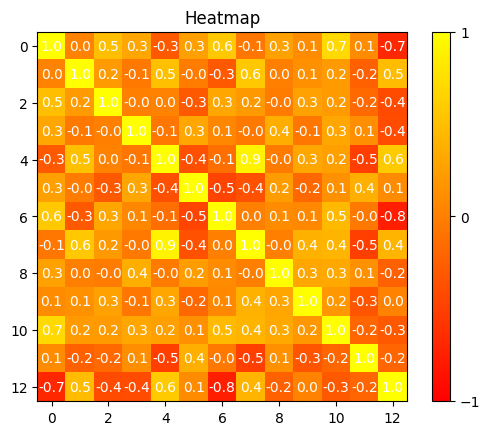

In [5]:
figure, axis = plt.subplots()
heatmap = axis.imshow(corr_matrix, cmap= "autumn", vmin=-1,  vmax= 1)
axis.set_title("Heatmap")
for i in range(13):
    for j in range(13):
        axis.annotate(f'{corr_matrix.iloc[i,j]:.1f}', xy = (i, j) , ha = 'center', va= "center", color='white')

colorbar = figure.colorbar(heatmap, ticks = [-1,0,1])
# axis.colorbar(ticks = [-1,0,1])
plt.show()
# heatmap = plt.imshow(corr_matrix, cmap = "autumn")
# plt.title("Heatmap")
# type(plt)
# heatmap

#SciKit Learn--Linear Regression


In [33]:
from sklearn import linear_model
from sklearn.feature_selection import SequentialFeatureSelector
# from mlxtend.feature_selection import SequentialFeatureSelector as sfs

boston_housing_path = "/Users/michaelwhitfield/Library/CloudStorage/GoogleDrive-purduemacademics@gmail.com/My Drive/Purdue Senior Year/Summer24/MGMT 473/Data Files/BostonHousing.csv"
boston_housing_df = pd.read_csv(boston_housing_path, sep= ",")

In [7]:
boston_housing_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,CAT. MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0,0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6,0
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7,1
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4,1
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,9.67,22.4,0
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,9.08,20.6,0
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,5.64,23.9,0
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,6.48,22.0,0


In [10]:
X_values = boston_housing_df.iloc[:,:-2]
X_values

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,9.67
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,9.08
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,5.64
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,6.48


In [18]:

y_values = boston_housing_df["MEDV"]
y_values

pandas.core.series.Series

In [40]:
lr_model = linear_model.LinearRegression()
sfs_forward = sfs(lr_model,
                  k_features="best",
                  forward=True,
                  verbose= 2,
                  scoring= "r2",
                  cv=5).fit(X_values,y_values)
# sfs_forward = sfs_forward.fit(X_values,y_values)
# forward_features = sfs_forward.k_feature_names_
# print(forward_features)
# SFS_forward = SequentialFeatureSelector(lr_model,direction="forward",scoring="r2")
# SFS_forward = SFS_forward.fit(X_values,y_values)
# forward_features = SFS_forward.
# print(forward_features)

/Users/michaelwhitfield/Desktop/MGMT473/venv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
/Users/michaelwhitfield/Desktop/MGMT473/venv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
/Users/michaelwhitfield/Desktop/MGMT473/venv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
/Users/michaelwhitfield/Desktop/MGMT473/venv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(


In [38]:
sfs_backward = sfs(lr_model,
                  k_features="best",
                  forward=False,
                  scoring= "r2",
                  cv=5)
sfs_backward = sfs_backward.fit(X_values,y_values)
backward_features = sfs_backward.k_feature_names_
print(backward_features)

/Users/michaelwhitfield/Desktop/MGMT473/venv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
/Users/michaelwhitfield/Desktop/MGMT473/venv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
/Users/michaelwhitfield/Desktop/MGMT473/venv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
/Users/michaelwhitfield/Desktop/MGMT473/venv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(


('CRIM', 'ZN', 'CHAS', 'NOX', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'LSTAT')


/Users/michaelwhitfield/Desktop/MGMT473/venv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
/Users/michaelwhitfield/Desktop/MGMT473/venv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(


LASSO REGRESSION

In [47]:
feature_names = list(X_values.columns)

In [48]:
from sklearn.model_selection import train_test_split

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X_values,y_values, test_size=.2, random_state=24)

In [52]:
from sklearn.preprocessing import StandardScaler

In [53]:
scaler = StandardScaler()

In [54]:
X_train = scaler.fit_transform(X_train)

In [55]:
X_test = scaler.fit_transform(X_test)

In [56]:
from sklearn.linear_model import Lasso

In [57]:
lasso = Lasso()

In [58]:
lasso.fit(X_train,y_train)

Lasso()

In [59]:
from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score

In [60]:
y_pred = lasso.predict(X_test)

In [61]:
mean_absolute_error(y_test,y_pred)

3.7430482310064064

In [62]:
mean_squared_error(y_test,y_pred)

29.59395179683228

In [63]:
r2_score(y_test,y_pred)

0.5630930017761999

In [64]:
import sklearn.pipeline

In [65]:
parameter_grid = {
    'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]
}

In [66]:
from sklearn.model_selection import GridSearchCV

In [67]:
lasso_cv = GridSearchCV(lasso, parameter_grid, cv=3, n_jobs=-1)

In [68]:
lasso_cv.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=Lasso(), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]})

In [69]:
y_pred2 = lasso_cv.predict(X_test)

In [70]:
mean_absolute_error(y_test, y_pred2)

3.554817742576727

In [71]:
mean_squared_error(y_test, y_pred2)

25.68545630684016

In [72]:
r2_score(y_test,y_pred2)

0.620795637903576

In [74]:
lasso3 = Lasso(alpha=.01)

In [75]:
lasso3.fit(X_train,y_train)

Lasso(alpha=0.01)

In [76]:
lasso3.intercept_

22.72475247524752

In [77]:
lasso3.coef_

array([-0.61813332,  1.01810549, -0.10137951,  0.86749139, -1.93486267,
        2.97244004, -0.05328705, -3.06076289,  2.01443121, -2.00635354,
       -1.80542227, -3.80670751])

In [78]:
df = pd.DataFrame({"Feature_Names": feature_names, "Coef": lasso3.coef_})

In [79]:
df

,Feature_Names,Coef
0,CRIM,-0.618133
1,ZN,1.018105
2,INDUS,-0.101380
3,CHAS,0.867491
4,NOX,-1.934863
5,RM,2.972440
6,AGE,-0.053287
7,DIS,-3.060763
8,RAD,2.014431
9,TAX,-2.006354


RIDGE REGRESSION

In [80]:
from sklearn.linear_model import Ridge

In [81]:
ridge = Ridge()

In [82]:
ridge.fit(X_train, y_train)

Ridge()

In [83]:
y_pred_ridge = ridge.predict(X_test)

In [85]:
mean_absolute_error(y_test,y_pred_ridge)

3.5552684326001525

In [86]:
mean_squared_error(y_test,y_pred_ridge)

25.66125682488133

In [87]:
r2_score(y_test,y_pred_ridge)

0.6211529042495438

In [88]:
ridge_cv = GridSearchCV(ridge, parameter_grid, cv=3, n_jobs=-1)

In [89]:
ridge_cv.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=Ridge(), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]})

In [90]:
y_pred_ridge2 = ridge_cv.predict(X_test)

In [91]:
mean_absolute_error(y_test,y_pred_ridge2)

3.5444437795924593

In [92]:
mean_squared_error(y_test,y_pred_ridge2)

25.926288946696413

In [93]:
r2_score(y_test,y_pred_ridge2)

0.617240132154419

In [94]:
ridge_cv.best_estimator_.intercept_

22.72475247524752

In [95]:
ridge_cv.best_estimator_.coef_

array([-0.58178542,  0.91434768, -0.27034779,  0.89338036, -1.70858212,
        3.02515799, -0.11535666, -2.82895901,  1.57749356, -1.59380453,
       -1.74717541, -3.66978946])